# Part 2: Model Selection

## Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 


Bad key "text.kerning_factor" on line 4 in
C:\Users\sumai\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## Load Dataset

Please see the link to know more about the dataset: https://archive.ics.uci.edu/ml/datasets/Parkinson%27s+Disease+Classification#

In [2]:
df = pd.read_csv('preprocessed_speech_features.csv')
df = df. drop('Unnamed: 0', axis=1)
df.head()

,gender,ppe,dfa,rpde,numpulses,numperiodspulses,meanperiodpulses,stddevperiodpulses,locpctjitter,locabsjitter,...,tqwt_kurtosisvalue_dec_28,tqwt_kurtosisvalue_dec_29,tqwt_kurtosisvalue_dec_30,tqwt_kurtosisvalue_dec_31,tqwt_kurtosisvalue_dec_32,tqwt_kurtosisvalue_dec_33,tqwt_kurtosisvalue_dec_34,tqwt_kurtosisvalue_dec_35,tqwt_kurtosisvalue_dec_36,class
0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,0.000018,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,0.000016,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,0.000015,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,0.000046,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,0.000044,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


## Split Input and Traget Variables

In [3]:
X = df.drop('class', axis = 1) 
y = df['class']

In [4]:
X.columns

Index(['gender', 'ppe', 'dfa', 'rpde', 'numpulses', 'numperiodspulses',
       'meanperiodpulses', 'stddevperiodpulses', 'locpctjitter',
       'locabsjitter',
       ...
       'tqwt_kurtosisvalue_dec_27', 'tqwt_kurtosisvalue_dec_28',
       'tqwt_kurtosisvalue_dec_29', 'tqwt_kurtosisvalue_dec_30',
       'tqwt_kurtosisvalue_dec_31', 'tqwt_kurtosisvalue_dec_32',
       'tqwt_kurtosisvalue_dec_33', 'tqwt_kurtosisvalue_dec_34',
       'tqwt_kurtosisvalue_dec_35', 'tqwt_kurtosisvalue_dec_36'],
      dtype='object', length=753)

## Train Test Split

In [5]:
# train_test_split is used to split the dataset into test set and train set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state =0)

print("Original shape of dataset: {}".format(df.shape))         # shape of original dataset
print("Shape of training dataset: {}".format(X_train.shape))      # shape of training dataset after split
print("Shape of testing dataset: {}".format(X_test.shape))        # shape of testing dataset after split

Original shape of dataset: (756, 754)
Shape of training dataset: (567, 753)
Shape of testing dataset: (189, 753)


In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Define Functions

#### Writing a function that returns the evaluation metrics as a DataFrame

In [7]:
def model_comparison(models =[], model_names= []): 
    
    acc = []
    prec = []
    recal = []
    f1_train = []
    f1_test = []
    roc_auc = []
    pr_auc = []
    
    for model in range(len(models)):
        clf = models[model]
        clf.fit(X_train, y_train)
        y_hat = clf.predict(X_test)
        y_hat_train = clf.predict(X_train) 
        pred_prob = clf.predict_proba(X_test)
        precision, recall, _ = precision_recall_curve(y_test, pred_prob[:, 1], pos_label=1)

        
        f1_train.append(f1_score(y_hat_train, y_train))
        f1_test.append(f1_score(y_hat, y_test))
        acc.append(accuracy_score(y_hat, y_test))
        prec.append(precision_score(y_hat, y_test))
        recal.append(recall_score(y_hat, y_test))
        roc_auc.append(roc_auc_score(y_test, y_hat))
        pr_auc.append(auc(recall, precision))
        
    compare = pd.DataFrame({'Algorithm' : model_names , 'ROC_AUC': roc_auc, 'PR_AUC': pr_auc, 'Precision': prec, 'Recall': recal, 'F1_Train': f1_train, 'F1_Test': f1_test, 'Accuracy' : acc, })
    return compare

#### Writing a function returns Macro and Weighted average of Recall Score

In [8]:

def macro_weighted(y_test, y_hat):
    
    rec = metrics.recall_score(y_test, y_hat)
    print ("Recall Score:", rec)

    rec_mac = metrics.recall_score(y_test, y_hat, average = 'macro')
    print ("Macro Average of Recall Score:", rec_mac)

    rec_wei = metrics.recall_score(y_test, y_hat, average = 'weighted')
    print ("Weighted Average of Recall Score:", rec_wei)

#### Detailed Macro & Weighted average values of the performance metrics

In [9]:
def macro_weighted_prec_rec(y_test, y_hat):
    
    rec = metrics.recall_score(y_test, y_hat)
    print ("Recall Score:", rec)
    
    rec_mac = metrics.recall_score(y_test, y_hat, average = 'macro')
    print ("Macro Average of Recall Score:", rec_mac)

    rec_wei = metrics.recall_score(y_test, y_hat, average = 'weighted')
    print ("Weighted Average of Recall Score:", rec_wei)
    
    print ('.')
    
    prec_mac = metrics.precision_score(y_test, y_hat, average = 'macro')
    print ("Macro Average of Precision Score:", prec_mac)

    prec_wei = metrics.precision_score(y_test, y_hat, average = 'weighted')
    print ("Weighted Average of Precision Score:", prec_wei)

    f1_mac = metrics.f1_score(y_test, y_hat, average = 'macro')
    print ("Macro Average of F1 Score:", f1_mac)

    f1_wei = metrics.f1_score(y_test, y_hat, average = 'weighted')
    print ("Weighted Average of F1 Score:", f1_wei)
    
    print ('.')
    
    acc = metrics.accuracy_score(y_test, y_hat)
    print ("Accuracy:", acc)

#### Performance of the Tarining & Test Set

In [10]:
def f1_acc(y_test, y_hat, y_train, y_hat_train): 
    
    acc_train = metrics.accuracy_score(y_train, y_hat_train)
    print ("Accuracy Score of Train Set:", acc_train)
    
    acc_test = metrics.accuracy_score(y_test, y_hat)
    print ("Accuracy Score of Test Set:", acc_test)
    
    print ('.')
    
    f1_train = metrics.f1_score(y_train, y_hat_train, average = 'macro')
    print ("F1 Score of Train Set:", f1_train)
    
    f1_test = metrics.f1_score(y_test, y_hat, average = 'macro')
    print ("F1 Score of Test Set:", f1_test)
    
    ax1 = sns.distplot(y_train, hist=False, color='pink', kde_kws={'bw':0.1}, label = 'Train Data')
    sns.distplot(y_hat_train, hist=False, ax=ax1, color='lightblue', kde_kws={'bw':0.1}, label = 'Predicted Data')
    
    plt.title('Actual vs Predicted Values for Diagnosis (Training Set)')
    plt.xlabel('Diagnosis')
    plt.ylabel('Proportion of Results')
    plt.legend()
    plt.show()
    
    ax2 = sns.distplot(y_test, hist=False, color='salmon', kde_kws={'bw':0.1}, label = 'Test Data')
    sns.distplot(y_hat, hist=False, ax=ax2, color='lightblue', kde_kws={'bw':0.1}, label = 'Predicted Result')
    plt.title('Actual vs Predicted Values for Diagnosis (Test Set)')
    plt.xlabel('Diagnosis')
    plt.ylabel('Proportion of Results')
    plt.legend()
    plt.show()

#### Let's look at the ROC_AUC, Precision Recall AUC and the Confusion Matrices of the top 5 models

In [11]:
def roc_pr_cm(models=[]):
    
    roc_auc = []
    pr_auc = []

    for model in range(len(models)):
        clf = models[model]
        clf.fit(X_train, y_train)
        y_hat = clf.predict(X_test)
        y_hat_train = clf.predict(X_train) 
    
        # predict probabilities
        pred_prob = clf.predict_proba(X_test)
    
        # Print the confusion matrix
        print('---------------------------------------------------------------')
        
        data = confusion_matrix(y_test, y_hat)
        df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
        df_cm.index.name = 'Actual'
        df_cm.columns.name = 'Predicted'
        plt.figure(figsize = (6, 4))
        #sns.set(font_scale=1.4) #for label size
        sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 12})# font size
        plt.show()
        
        tn, fp, fn, tp = confusion_matrix(y_test, y_hat).ravel()
        print ("TP: {}, FP: {}, TN: {}, FN: {}".format(tp, fp, tn, fn))

        # Print the precision and recall, among other metrics
        print('---------------------------------------------------------------')
        print(metrics.classification_report(y_test, y_hat, digits=3))
        
        print('---------------------------------------------------------------')
        
        macro_weighted(y_test, y_hat)
        
        print('---------------------------------------------------------------')
     
        fpr, tpr, thresh = roc_curve(y_test, pred_prob[:, 1], pos_label=1)
        roc_auc.append(roc_auc_score(y_test, y_hat))
    
        plt.style.use('seaborn')
        plt.figure(figsize=(8, 4))
        # plot roc curves
        plt.plot(fpr, tpr, label = models[model])
    
        plt.title('ROC curve where AUC= {}'.format(roc_auc[model]))
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive rate')

        plt.legend(loc='best')
        plt.savefig('ROC', dpi=300)
        plt.show();
    
        # calculate model precision-recall curve
        # precision, recall, _ = precision_recall_curve(y_hat , y_test)
        precision, recall, _ = precision_recall_curve(y_test, pred_prob[:, 1], pos_label=1)
        pr_auc.append(auc(recall, precision))
    
        # plot the model precision-recall curve
        plt.style.use('seaborn')
        plt.figure(figsize=(8, 4))
        plt.plot(recall, precision, marker='.', label = models[model])
        plt.title('Precision Recall curve AUC= {}'.format(pr_auc[model]))
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.legend(loc='best')
        plt.show()

### Model Selection (a) LazyClassifier

In [12]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose = 0, ignore_warnings = True, custom_metric = None)
model, predictions = clf.fit(X_train, X_test, y_train, y_test)
model

100%|██████████| 30/30 [00:11<00:00,  2.58it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.91,0.86,0.86,0.91,1.86
XGBClassifier,0.90,0.85,0.85,0.90,1.87
AdaBoostClassifier,0.88,0.82,0.82,0.88,1.77
BaggingClassifier,0.87,0.81,0.81,0.87,1.85
LinearSVC,0.81,0.79,0.79,0.82,0.19
ExtraTreesClassifier,0.88,0.78,0.78,0.87,0.25
Perceptron,0.84,0.78,0.78,0.84,0.05
RidgeClassifierCV,0.82,0.78,0.78,0.82,0.09
LogisticRegression,0.83,0.77,0.77,0.83,0.08


### Model Selection (b) Trying out Several Models

In [13]:
# Modelling Algorithms
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier 
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.tree import ExtraTreeClassifier
from lightgbm.sklearn import LGBMClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.metrics import f1_score,accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score, confusion_matrix

#### Let's try to model some classifiers for this dataset

In [14]:
models = [LogisticRegression(), AdaBoostClassifier(), BaggingClassifier(), KNeighborsClassifier(), RandomForestClassifier(), BaggingClassifier(RandomForestClassifier()), XGBClassifier(),
        DecisionTreeClassifier(), GradientBoostingClassifier(), GaussianNB(), CatBoostClassifier(logging_level='Silent'), ExtraTreeClassifier(), LGBMClassifier(), LinearDiscriminantAnalysis() , 
        QuadraticDiscriminantAnalysis(), EasyEnsembleClassifier(random_state = 25)]

model_names=['LogisticRegression','AdaBoostClassifier', 'BaggingClassifier', 'KNearestNeighbors','RandomForest','BaggingRF', 'XGBoost', 'DecisionTree',
             'GradientBoosting','GaussianNB', 'CatBoost', 'ExtraTree', 'LGBM', 'LinearDiscriminantAnalysis','QuadraticDiscriminantAnalysis', 'EasyClassifier']

compare = model_comparison(models, model_names)
compare 

,Algorithm,ROC_AUC,PR_AUC,Precision,Recall,F1_Train,F1_Test,Accuracy
0,LogisticRegression,0.77,0.96,0.88,0.89,1.00,0.88,0.83
1,AdaBoostClassifier,0.82,0.97,0.94,0.91,1.00,0.93,0.88
2,BaggingClassifier,0.75,0.95,0.90,0.88,1.00,0.89,0.83
3,KNearestNeighbors,0.75,0.97,0.94,0.87,0.95,0.91,0.85
4,RandomForest,0.79,0.98,0.97,0.89,1.00,0.93,0.88
5,BaggingRF,0.75,0.97,0.95,0.87,0.99,0.91,0.86
6,XGBoost,0.85,0.97,0.96,0.92,1.00,0.94,0.90
7,DecisionTree,0.74,0.92,0.88,0.88,1.00,0.88,0.81
8,GradientBoosting,0.81,0.97,0.94,0.90,1.00,0.92,0.88
9,GaussianNB,0.73,0.92,0.85,0.88,0.88,0.86,0.79


#### What are the top 5 models with highest Recall Score? (class 1)

In [15]:
top5 = compare.nlargest(5,'Precision')
top5

,Algorithm,ROC_AUC,PR_AUC,Precision,Recall,F1_Train,F1_Test,Accuracy
4,RandomForest,0.79,0.98,0.97,0.89,1.00,0.93,0.88
6,XGBoost,0.85,0.97,0.96,0.92,1.00,0.94,0.90
10,CatBoost,0.82,0.98,0.96,0.91,1.00,0.93,0.89
12,LGBM,0.86,0.98,0.96,0.93,1.00,0.94,0.91
5,BaggingRF,0.75,0.97,0.95,0.87,0.99,0.91,0.86


---------------------------------------------------------------


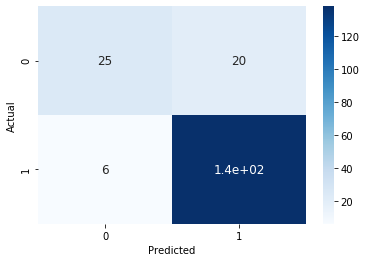

TP: 138, FP: 20, TN: 25, FN: 6
---------------------------------------------------------------
              precision    recall  f1-score   support

           0      0.806     0.556     0.658        45
           1      0.873     0.958     0.914       144

    accuracy                          0.862       189
   macro avg      0.840     0.757     0.786       189
weighted avg      0.857     0.862     0.853       189

---------------------------------------------------------------
Recall Score: 0.9583333333333334
Macro Average of Recall Score: 0.7569444444444444
Weighted Average of Recall Score: 0.8624338624338624
---------------------------------------------------------------


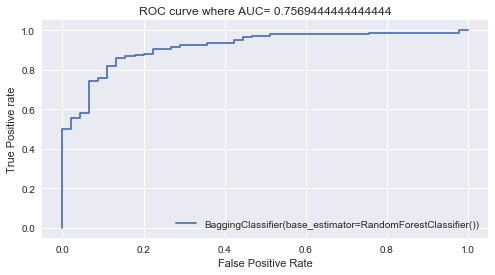

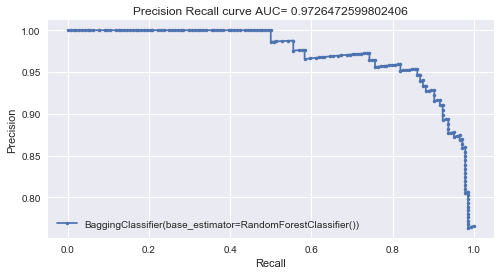

---------------------------------------------------------------


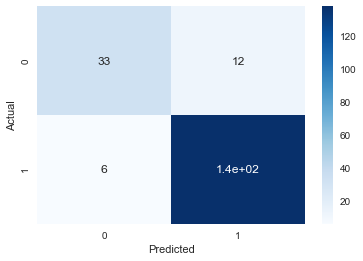

TP: 138, FP: 12, TN: 33, FN: 6
---------------------------------------------------------------
              precision    recall  f1-score   support

           0      0.846     0.733     0.786        45
           1      0.920     0.958     0.939       144

    accuracy                          0.905       189
   macro avg      0.883     0.846     0.862       189
weighted avg      0.902     0.905     0.902       189

---------------------------------------------------------------
Recall Score: 0.9583333333333334
Macro Average of Recall Score: 0.8458333333333333
Weighted Average of Recall Score: 0.9047619047619048
---------------------------------------------------------------


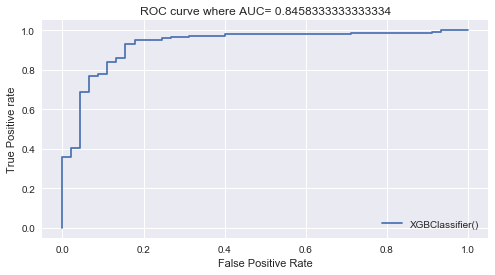

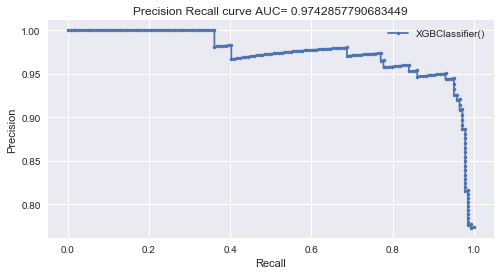

---------------------------------------------------------------


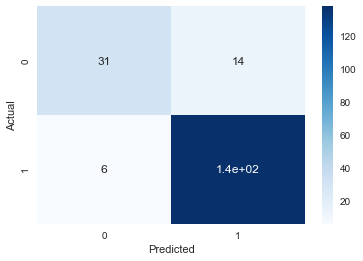

TP: 138, FP: 14, TN: 31, FN: 6
---------------------------------------------------------------
              precision    recall  f1-score   support

           0      0.838     0.689     0.756        45
           1      0.908     0.958     0.932       144

    accuracy                          0.894       189
   macro avg      0.873     0.824     0.844       189
weighted avg      0.891     0.894     0.890       189

---------------------------------------------------------------
Recall Score: 0.9583333333333334
Macro Average of Recall Score: 0.8236111111111111
Weighted Average of Recall Score: 0.8941798941798942
---------------------------------------------------------------


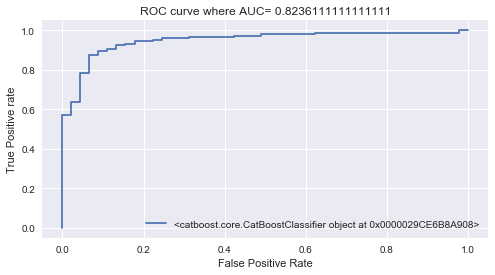

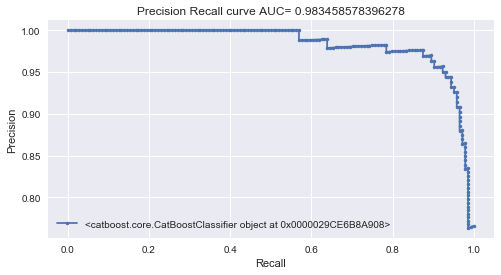

---------------------------------------------------------------


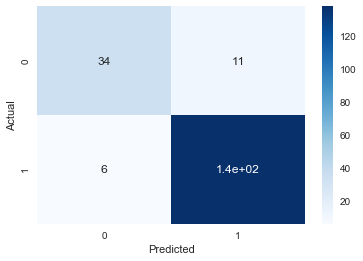

TP: 138, FP: 11, TN: 34, FN: 6
---------------------------------------------------------------
              precision    recall  f1-score   support

           0      0.850     0.756     0.800        45
           1      0.926     0.958     0.942       144

    accuracy                          0.910       189
   macro avg      0.888     0.857     0.871       189
weighted avg      0.908     0.910     0.908       189

---------------------------------------------------------------
Recall Score: 0.9583333333333334
Macro Average of Recall Score: 0.8569444444444445
Weighted Average of Recall Score: 0.91005291005291
---------------------------------------------------------------


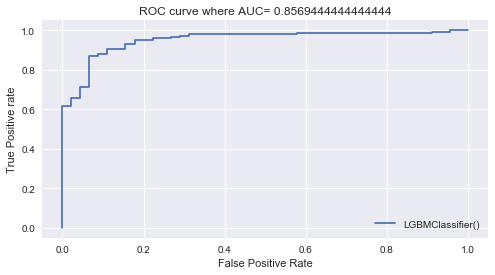

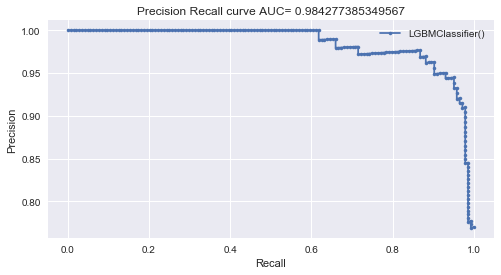

---------------------------------------------------------------


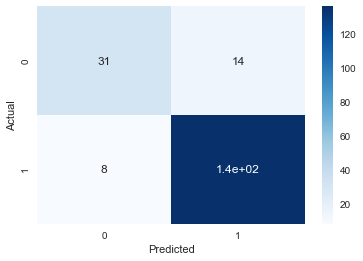

TP: 136, FP: 14, TN: 31, FN: 8
---------------------------------------------------------------
              precision    recall  f1-score   support

           0      0.795     0.689     0.738        45
           1      0.907     0.944     0.925       144

    accuracy                          0.884       189
   macro avg      0.851     0.817     0.832       189
weighted avg      0.880     0.884     0.881       189

---------------------------------------------------------------
Recall Score: 0.9444444444444444
Macro Average of Recall Score: 0.8166666666666667
Weighted Average of Recall Score: 0.8835978835978836
---------------------------------------------------------------


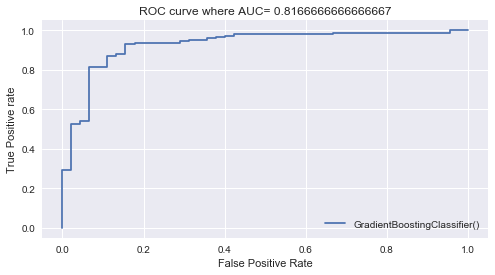

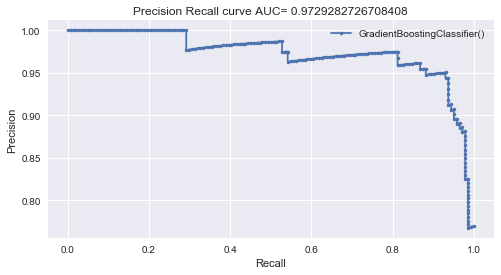

In [16]:
models = [BaggingClassifier(RandomForestClassifier()), XGBClassifier(), CatBoostClassifier(logging_level='Silent'), LGBMClassifier(), GradientBoostingClassifier()]
roc_pr_cm(models)

### XGBoost OR LGBM Classifier??

Recall Score: 0.970873786407767
Macro Average of Recall Score: 0.8236721873215306
Weighted Average of Recall Score: 0.8978102189781022
.
Macro Average of Precision Score: 0.8927581427581428
Weighted Average of Precision Score: 0.8968592399249334
Macro Average of F1 Score: 0.8506230529595016
Weighted Average of F1 Score: 0.892907656274871
.
Accuracy: 0.8978102189781022


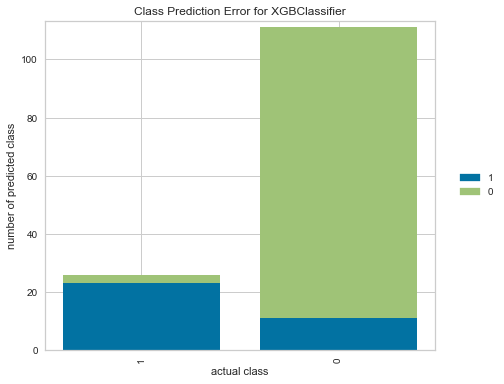

Recall Score: 0.970873786407767
Macro Average of Recall Score: 0.8530839520274129
Weighted Average of Recall Score: 0.9124087591240876
.
Macro Average of Precision Score: 0.9051441677588468
Weighted Average of Precision Score: 0.9113325233662742
Macro Average of F1 Score: 0.8749239196591602
Weighted Average of F1 Score: 0.9094099719668934
.
Accuracy: 0.9124087591240876


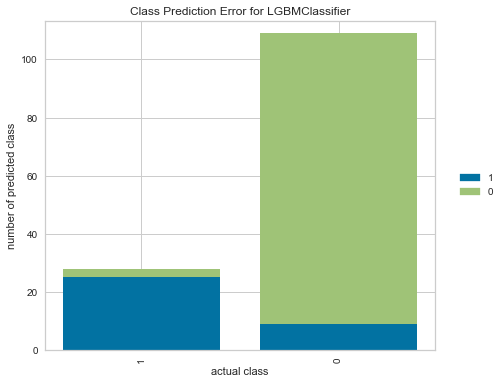

In [17]:
from sklearn import model_selection
from pprint import pprint

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18, random_state =0)

model = [XGBClassifier(random_state = 42), LGBMClassifier(random_state = 42)]

for m in model:

    m.fit(X_train, y_train)
    y_hat = m.predict(X_test)
    y_hat_train = m.predict(X_train)

    macro_weighted_prec_rec(y_test, y_hat)

    classes = [1, 0]

    from yellowbrick.classifier import ClassPredictionError
    visualizer = ClassPredictionError(m, classes=classes)

    # Fit the training data to the visualizer
    visualizer.fit(X_train, y_train)

    # Evaluate the model on the test data
    visualizer.score(X_test, y_test)

    # Draw visualization
    visualizer.show()

### Chosen model: LGBM Classifier

Parameters currently in use:

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 42,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}
 
Accuracy Score of Train Set: 1.0
Accuracy Score of Test Set: 0.9124087591240876
.
F1 Score of Train Set: 1.0
F1 Score of Test Set: 0.8749239196591602


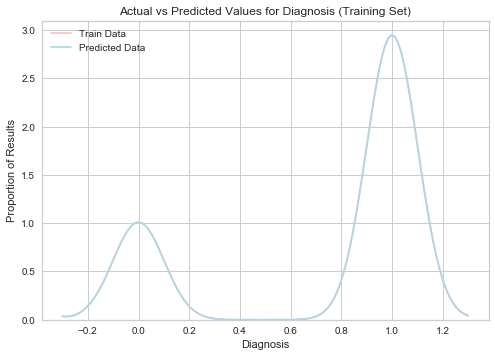

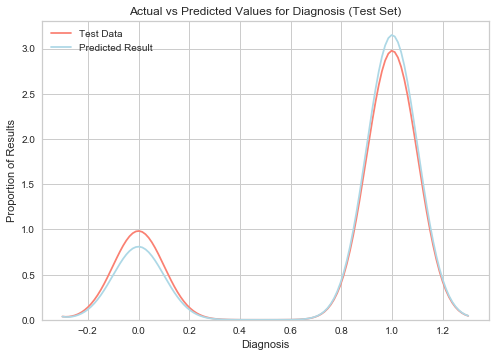

In [18]:
lgbm = LGBMClassifier(random_state = 42)

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(lgbm.get_params())

print (' ')

lgbm.fit(X_train, y_train)
y_hat = lgbm.predict(X_test)
y_hat_train = lgbm.predict(X_train)

f1_acc(y_test, y_hat, y_train, y_hat_train)